In [111]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random


In [112]:
np.random.seed(0)

In [113]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  

In [114]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [115]:
assert(x_train.shape[0] == y_train.shape[0]), 'fail'
assert(x_test.shape[0] == y_test.shape[0]), 'fail'
assert(x_train.shape[1:] == (28,28)), 'fail'
assert(x_test.shape[1:] == (28,28)), 'fail'


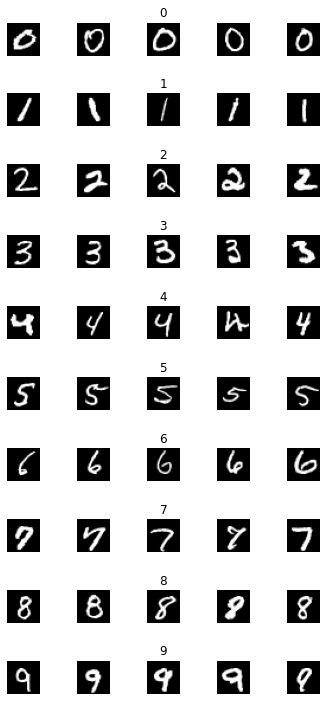

In [116]:
num_of_samples = []

columns = 5
num_of_classes = 10

fig, axis = plt.subplots(nrows=num_of_classes, ncols=columns, figsize=(5,10))
fig.tight_layout()

for i in range(columns):
    for j in range(num_of_classes):
        x_selected = x_train[y_train == j]
        axis[j][i].imshow(x_selected[random.randint(0, len(x_selected- 1)),:,:], cmap = plt.get_cmap('gray'))
        axis[j][i].axis('off')
        if i == 2:
            axis[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of Images')

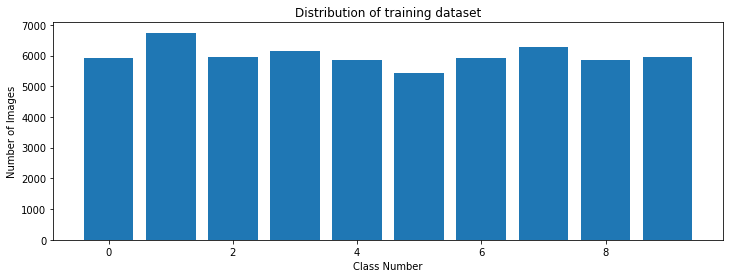

In [117]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_of_classes), num_of_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")

In [118]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [119]:
# normalization
x_train = x_train / 255
x_test = x_test / 255


In [120]:
num_pixels = 784
x_train = x_train.reshape(x_train.shape[0], num_pixels)
x_test = x_test.reshape(x_test.shape[0], num_pixels)

print(x_test.shape)

(10000, 784)


In [121]:
def create_model():
    model = Sequential()
    model.add(Dense(784,input_dim=num_pixels, activation='relu'))
    model.add(Dense(784, activation='relu'))
    model.add(Dense(784, activation='relu'))
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model




In [122]:
model = create_model()
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_19 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
None


In [123]:
history = model.fit(x_train, y_train, batch_size=200, epochs=10, verbose=1, validation_split=0.1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 4s 14ms/step - loss: 0.3169 - accuracy: 0.9147 - val_loss: 0.1314 - val_accuracy: 0.9603
Epoch 2/10
270/270 [==============================] - 4s 14ms/step - loss: 0.1276 - accuracy: 0.9618 - val_loss: 0.1202 - val_accuracy: 0.9650
Epoch 3/10
270/270 [==============================] - 4s 14ms/step - loss: 0.1050 - accuracy: 0.9691 - val_loss: 0.1199 - val_accuracy: 0.9687
Epoch 4/10
270/270 [==============================] - 4s 14ms/step - loss: 0.0945 - accuracy: 0.9721 - val_loss: 0.1111 - val_accuracy: 0.9707
Epoch 5/10
270/270 [==============================] - 4s 14ms/step - loss: 0.0861 - accuracy: 0.9747 - val_loss: 0.1515 - val_accuracy: 0.9660
Epoch 6/10
270/270 [==============================] - 4s 13ms/step - loss: 0.0804 - accuracy: 0.9776 - val_loss: 0.1368 - val_accuracy: 0.9692
Epoch 7/10
270/270 [==============================] - 3s 13ms/step - loss: 0.0696 - accuracy: 0.9802 - val_loss: 0.1248 - val_accuracy: 0.9742

Text(0.5, 0, 'epoch')

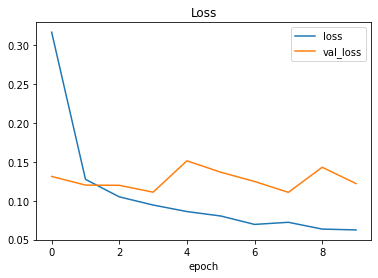

In [124]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

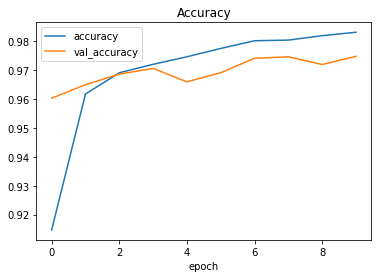

In [125]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [127]:
score = model.evaluate(x_test, y_test, verbose=1)
print(type(score))
print('Test Score:', score[0])
print('Test accuracy', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.1616 - accuracy: 0.9701
<class 'list'>
Test Score: 0.161634624004364
Test accuracy 0.9700999855995178


<Response [200]>


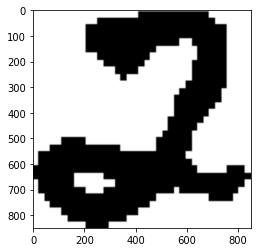

In [129]:
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose-Sempere-2/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

(850, 850, 4)
(28, 28)


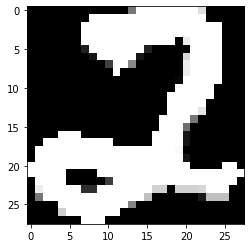

In [136]:
import cv2

img_array = np.asarray(img)
print(img_array.shape)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
print(gray_scale.shape)
plt.imshow(gray_scale, cmap= plt.get_cmap('gray'))
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap= plt.get_cmap('gray'))

In [137]:
image = image / 255
image = image.reshape(1, 784)
print(image)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.4627451  1.         1.         1.         1.
  1.         1.         1.         1.         0.87058824 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.00784314 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         1.         1.         1.         1.
  1.         1.         1.         1.   

In [139]:
prediction = np.argmax(model.predict(image), axis=-1)
print('Predicted:', str(prediction))

Predicted: [2]
